# Classifications Models

## Importations

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc
accper=[]
acclab=['SVM','Logistic','ANN','Decision Trees','Random Forest','Naive Bayes','KNN']

In [2]:
xtr=pd.read_csv('featured_train.csv')
xte=pd.read_csv('featured_test.csv')

In [3]:
d1=pd.read_csv('train.csv')
d2=pd.read_csv('test.csv')
ytr=d1['target']
yte=d2['target']

#### We have imported the featured training and testing models along with their target values and now its time for applying different algorithms for checking their acuracy

In [4]:
xtr.drop('Unnamed: 0',axis=1,inplace=True)
xte.drop('Unnamed: 0',axis=1,inplace=True)

## Algorithm 1 - Support Vector Classifier

In [5]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc =MinMaxScaler()
xtrsvm=sc.fit_transform(xtr)
xtesvm=sc.transform(xte)

In [6]:
import sklearn
clfsvm=sklearn.svm.SVC(kernel='linear')
clfsvm.fit(xtrsvm,ytr)

SVC(kernel='linear')

In [7]:
pred=clfsvm.predict(xtesvm)
# predsvm=clfsvm.decision_function(xte)
print(sklearn.metrics.accuracy_score(yte,pred))
accper.append(sklearn.metrics.accuracy_score(yte,pred))

0.9473684210526315


In [8]:
print(sklearn.metrics.classification_report(yte,pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        63
           1       0.94      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



## Algorithm 2 - Logistic Regression

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, itr=10000):
        self.lr = lr
        self.itr = itr
        self.weights = None
        self.bias = None
#         print("Learning Rate :",self.lr,"Number of Iterations",self.itr,"Weights :",self.weights)

    def fit(self, X, y):
        n, feat = X.shape
        self.weights = np.zeros(feat)
        self.bias = 0
#         print("Weight Updates :",self.weights)

        for _ in range(self.itr):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n) * np.dot(X.T, (predictions - y))
            db = (1/n) * np.sum(predictions-y)
            
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
#             print("Bias update :",self.bias)
            
#             print("Weight Updates :",self.weights,"Bias Update :",self.bias)
        return self.weights,self.bias

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [10]:
clflogr=LogisticRegression(lr=0.005)
k,m=clflogr.fit(xtr,ytr)
y_pred=clflogr.predict(xte)

In [11]:
def accuracy(y_pred, yte):
    return np.sum(y_pred==yte)/len(yte)
acc = accuracy(y_pred, yte)
print('Accuracy : ',acc*100)
from  sklearn.metrics import classification_report
print(classification_report(yte,y_pred))
accper.append(acc)

Accuracy :  77.77777777777779
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        63
           1       0.80      0.86      0.83       108

    accuracy                           0.78       171
   macro avg       0.76      0.75      0.75       171
weighted avg       0.77      0.78      0.77       171



## Algorithm 3 - Implementing Pipelines

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import set_config

In [13]:
set_config(display="diagram")
pipe= Pipeline([('Scaling',MinMaxScaler()),('PCA',PCA(n_components=7)),('LogReg',LogisticRegression())])
pipe2= Pipeline([('Scaling',MinMaxScaler()),('Knn',KNeighborsClassifier(n_neighbors=9))])
# pipe 2 tested at different neighbors and was found out 9 is the optimal one 

In [14]:
pipe.fit(xtr,ytr)

Pipeline(steps=[('Scaling', MinMaxScaler()), ('PCA', PCA(n_components=7)),
                ('LogReg', LogisticRegression())])

In [15]:
pipe2.fit(xtr,ytr)

Pipeline(steps=[('Scaling', MinMaxScaler()),
                ('Knn', KNeighborsClassifier(n_neighbors=9))])

In [16]:
predpipe1=pipe.predict(xte)
predpipe2=pipe2.predict(xte)

In [17]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy :",accuracy_score(yte,predpipe1))
print(classification_report(yte,predpipe1))

Accuracy : 0.9415204678362573
              precision    recall  f1-score   support

           0       0.96      0.87      0.92        63
           1       0.93      0.98      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [18]:
print("Accuracy :",accuracy_score(yte,predpipe2))
print(classification_report(yte,predpipe2))

Accuracy : 0.9298245614035088
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        63
           1       0.92      0.97      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



## Algorithm 4 - Artificial Neural Network (Perceptron)

In [19]:
import tensorflow as tf 
tf.random.set_seed(1)
from tensorflow import keras

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout
import tensorflow

In [21]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(10,)),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid'),
])

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(xtr,ytr,validation_split=0.15,epochs=50)

Epoch 1/50
11/11 [==============================] - 1s 22ms/step - loss: 1.2881 - accuracy: 0.3817 - val_loss: 0.6966 - val_accuracy: 0.4667
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.6479 - val_loss: 0.7868 - val_accuracy: 0.6000
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6568 - val_loss: 0.6776 - val_accuracy: 0.5667
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.5947 - val_loss: 0.6869 - val_accuracy: 0.4833
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.6627 - val_loss: 0.6814 - val_accuracy: 0.6667
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.6953 - val_loss: 0.6748 - val_accuracy: 0.6333
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6129 - accuracy: 0.6657 - val_loss: 0.6761 - val_accuracy: 0.5667
Epoch 8/50
11/11 [=

In [24]:
loss,acc=model.evaluate(xte,yte)
accper.append(acc)
print(acc,loss)

6/6 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.7602
0.7602339386940002 0.5241326689720154


In [25]:
import matplotlib.pyplot as plt

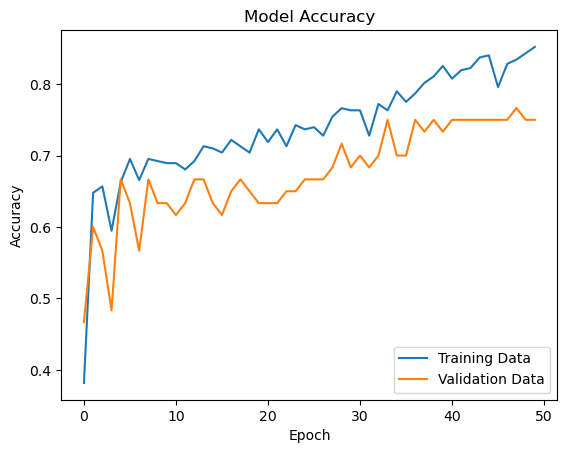

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Data','Validation Data',],loc='lower right')

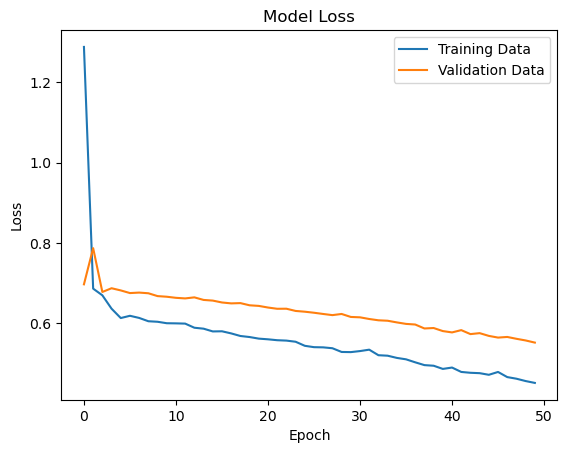

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Data','Validation Data',],loc='upper right')

### After Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc= StandardScaler()
xtrn=sc.fit_transform(xtr)
xten=sc.transform(xte)

In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
loss2,acc2=model.evaluate(xten,yte)
print(acc2)

6/6 [==============================] - 0s 2ms/step - loss: 1.5022 - accuracy: 0.5263
0.5263158082962036


In [31]:
h2=model.fit(xtr,ytr,validation_split=0.15,epochs=50)

Epoch 1/50
11/11 [==============================] - 0s 19ms/step - loss: 0.4680 - accuracy: 0.8018 - val_loss: 0.5624 - val_accuracy: 0.7333
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.8195 - val_loss: 0.5486 - val_accuracy: 0.7500
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.8432 - val_loss: 0.5640 - val_accuracy: 0.7333
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.8107 - val_loss: 0.5452 - val_accuracy: 0.7500
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8580 - val_loss: 0.5493 - val_accuracy: 0.7333
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.8580 - val_loss: 0.5387 - val_accuracy: 0.7667
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.8580 - val_loss: 0.5426 - val_accuracy: 0.7500
Epoch 8/50
11/11 [=

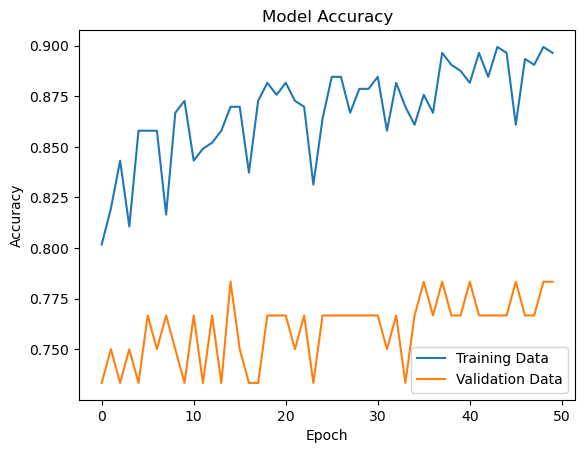

In [32]:
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Data','Validation Data',],loc='lower right')

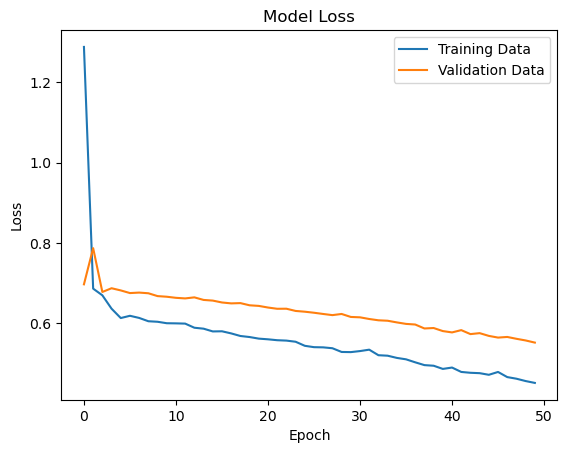

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Data','Validation Data',],loc='upper right')

## Algorithm 5 - Decision Trees 

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clfdt=DecisionTreeClassifier(max_leaf_nodes=8, random_state=1)
clfdt.fit(xtr,ytr)

DecisionTreeClassifier(max_leaf_nodes=8, random_state=1)

In [36]:
preddt=clfdt.predict(xte)

In [37]:
print(accuracy(yte,preddt))
accper.append(accuracy(yte,preddt))

0.8830409356725146


## Algorithm 6 - Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
clfrf=RandomForestClassifier(n_estimators=28,criterion='entropy',random_state=1)
clfrf.fit(xtr,ytr)

RandomForestClassifier(criterion='entropy', n_estimators=28, random_state=1)

In [39]:
predrf=clfrf.predict(xte)

In [40]:
print('Accuracy :',accuracy(yte,predrf))
accper.append(accuracy(yte,predrf))

Accuracy : 0.9239766081871345


## Algorithm 7 - Gaussian Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
clfgnb = GaussianNB()
clfgnb.fit(xtr,ytr)

GaussianNB()

In [42]:
predgnb=clfgnb.predict(xte)

In [43]:
print('Accuracy :',accuracy(yte,predgnb))
accper.append(accuracy(yte,predgnb))

Accuracy : 0.935672514619883


## Algorithm 8 - K- Nearest Neighbors

In [46]:
from sklearn import datasets
data=pd.DataFrame(bc.data,columns=bc.feature_names)
# print(data.head())
# plt.figure()
# plt.show()
# sns.heatmap(data.corr(),cbar=True,annot=True)

NameError: name 'bc' is not defined

In [47]:
from collections import Counter

def ED(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x, y):
        self.xtr = x
        self.ytr = y

    def predict(self, xte):
        predictions = [self._predict(i) for i  in xte]
        return predictions
    
    def _predict(self, i):
#        finding a distance array of xte element(i) from all the elements with wihich is trained
        distances = [ED(i, xtr) for xtr in self.xtr]
#       suppose the distance matrix is [12,15,34,453,23,54,...] that is from xte of one person to all the other elements of xtr
#       ki = [0,1,4,2,5,3,...] for only k values will be taken
#       now ytr[ki[i]] is checked weather its diabetic or not and stored in a k_neighbour (knl) 
#       now the most_common functions gives the max frequency occuring weather the person is diabetic or not 
#       finding array of indices required in order for array to be ascending sorted after calculating distances of the test point with every point in the training set
#       also taking only k closest point into account and comparing those points with ytr for finding which it is closest too
        ki = np.argsort(distances)[:self.k]
#       knl is the result it got weather that person in diabetic or not ... after checking which frequency is highest i.e 0/1 (diabetic/non-diabetic) and stored into predictions array
        knl = [self.ytr[i] for i in ki]
#         print(knl)
        most_common = Counter(knl).most_common()
        return most_common[0][0]

In [48]:
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target
data=pd.DataFrame(bc.data,columns=bc.feature_names)
# print(data.head())
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.3,random_state=10)

l=[]
# for i in range(1,25):
clf = KNN(k=5)
clf.fit(xtr, ytr)
predictions = clf.predict(xte)
    # print(predictions)
acc = np.sum(predictions == yte) / len(yte)
print('Accuracy :',acc)
print(classification_report(yte,predictions))
accper.append(acc)

Accuracy : 0.9415204678362573
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.96      0.96      0.96       112

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## Performance

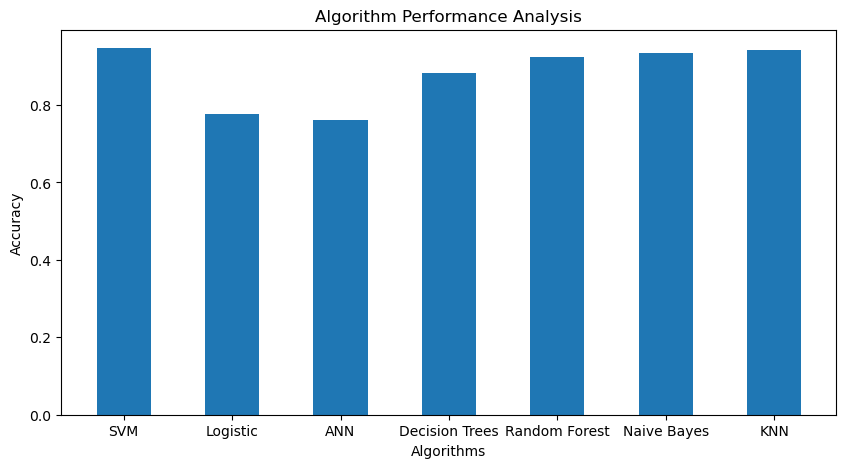

In [49]:
plt.figure(figsize=(10,5))
plt.bar(acclab,accper,width=0.5)
plt.xlabel('Algorithms',)
plt.ylabel('Accuracy')
plt.title('Algorithm Performance Analysis')
plt.show()